In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
id_uf = pd.read_csv('/content/id_uf.csv', dtype='string')
id_uf.rename(columns={'sigla':'sigla_uf'}, inplace=True)
id_reg = pd.read_csv('/content/id_reg.csv', dtype='string')
id_reg['regiao'] = id_reg['regiao'].replace(['Norte','Nordeste','Sudeste', 'Sul', 'Centro-Oeste'],['1', '2','3','4','5'])
id_reg.rename(columns={'regiao':'id_regiao'}, inplace=True)

In [ ]:
ordem = ['ano', 'id_regiao', 'sigla_uf', 'id_municipio', 'id_escola', 'rede', 'localizacao', 'serie', 'turno', 'disciplina', 'id_turma', 'id_aluno', 
         'sexo', 'raca_cor', 'estrato', 'amostra', 'peso_aluno', 'proficiencia', 'erro_padrao', 'proficiencia_saeb', 'erro_padrao_saeb']

##### **2019**

In [ ]:
#saeb 2019

#nota metodológica: exclusão de observações com a variável IN_PREENCHIMENTO = 0 uma vez que não existe nota referente ao aluno (NA), nem informações 
#socioeconômicas, além de ID_MUNICIPIO e ID_ESCOLA estarem mascarados com o dígito 6

rename19 = {'ID_SAEB':'ano', 'ID_REGIAO':'id_regiao', 'ID_UF':'id_uf', 'ID_MUNICIPIO':'id_municipio', 'ID_ESCOLA':'id_escola',
            'ID_DEPENDENCIA_ADM':'rede', 'ID_LOCALIZACAO':'localizacao', 'ID_TURMA':'id_turma', 'ID_TURNO':'turno', 'ID_SERIE':'serie', 
            'ID_ALUNO':'id_aluno', 'IN_AMOSTRA':'amostra', 'ESTRATO':'estrato', 'PESO_ALUNO_LP':'peso_aluno', 'PROFICIENCIA_LP':'proficiencia', 
            'ERRO_PADRAO_LP':'erro_padrao', 'PROFICIENCIA_LP_SAEB':'proficiencia_saeb', 'ERRO_PADRAO_LP_SAEB':'erro_padrao_saeb', 'PESO_ALUNO_MT':'peso_aluno',
            'PROFICIENCIA_MT':'proficiencia', 'ERRO_PADRAO_MT':'erro_padrao', 'PROFICIENCIA_MT_SAEB':'proficiencia_saeb', 
            'ERRO_PADRAO_MT_SAEB':'erro_padrao_saeb', 'TX_RESP_Q002':'raca_cor'}

LP_2 = ['ID_SAEB', 'ID_REGIAO', 'ID_UF', 'ID_MUNICIPIO', 'ID_AREA', 'ID_ESCOLA', 'ID_DEPENDENCIA_ADM', 'ID_LOCALIZACAO', 'ID_TURMA', 'ID_TURNO',
       'ID_SERIE', 'ID_ALUNO', 'IN_PREENCHIMENTO_LP', 'IN_PROFICIENCIA_LP', 'IN_AMOSTRA', 'ESTRATO', 'PESO_ALUNO_LP', 'PROFICIENCIA_LP', 'ERRO_PADRAO_LP',
       'PROFICIENCIA_LP_SAEB', 'ERRO_PADRAO_LP_SAEB']

LP = ['ID_SAEB', 'ID_REGIAO', 'ID_UF', 'ID_MUNICIPIO', 'ID_AREA', 'ID_ESCOLA', 'ID_DEPENDENCIA_ADM', 'ID_LOCALIZACAO', 'ID_TURMA', 'ID_TURNO',
       'ID_SERIE', 'ID_ALUNO', 'IN_PREENCHIMENTO_LP', 'IN_PROFICIENCIA_LP', 'IN_AMOSTRA', 'ESTRATO', 'PESO_ALUNO_LP', 'PROFICIENCIA_LP', 'ERRO_PADRAO_LP',
       'PROFICIENCIA_LP_SAEB', 'ERRO_PADRAO_LP_SAEB', 'TX_RESP_Q002']

MT_2 = ['ID_SAEB', 'ID_REGIAO', 'ID_UF', 'ID_MUNICIPIO', 'ID_AREA', 'ID_ESCOLA', 'ID_DEPENDENCIA_ADM', 'ID_LOCALIZACAO', 'ID_TURMA', 'ID_TURNO',
       'ID_SERIE', 'ID_ALUNO', 'IN_PREENCHIMENTO_MT', 'IN_PROFICIENCIA_MT', 'IN_AMOSTRA', 'ESTRATO', 'PESO_ALUNO_MT', 'PROFICIENCIA_MT', 'ERRO_PADRAO_MT',
       'PROFICIENCIA_MT_SAEB', 'ERRO_PADRAO_MT_SAEB']

MT = ['ID_SAEB', 'ID_REGIAO', 'ID_UF', 'ID_MUNICIPIO', 'ID_AREA', 'ID_ESCOLA', 'ID_DEPENDENCIA_ADM', 'ID_LOCALIZACAO', 'ID_TURMA', 'ID_TURNO',
       'ID_SERIE', 'ID_ALUNO', 'IN_PREENCHIMENTO_MT', 'IN_PROFICIENCIA_MT', 'IN_AMOSTRA', 'ESTRATO', 'PESO_ALUNO_MT', 'PROFICIENCIA_MT', 'ERRO_PADRAO_MT',
       'PROFICIENCIA_MT_SAEB', 'ERRO_PADRAO_MT_SAEB', 'TX_RESP_Q002']

add_19 = pd.DataFrame(columns=['raca_cor', 'sexo'])

s_2s = pd.read_csv('/content/gdrive/MyDrive/br_inep_saeb/input/saeb19_aluno_2ano.csv', dtype='string', sep=',')
lp = s_2s[LP_2]
#lp = lp[lp.IN_PREENCHIMENTO_LP.isin(['1'])]
lp['disciplina'] = 'LP'
lp.rename(columns=rename19, inplace=True)
mt = s_2s[MT_2]
#mt = mt[mt.IN_PREENCHIMENTO_MT.isin(['1'])]
mt['disciplina'] = 'MT'
mt.rename(columns=rename19, inplace=True)
saeb_ef_2ano = lp.append(mt, ignore_index=True)
saeb_ef_2ano = pd.concat([saeb_ef_2ano, add_19])
saeb_ef_2ano = pd.merge(saeb_ef_2ano, id_uf, how='left', left_on=['id_uf'], right_on=['id_uf'])
saeb_ef_2ano = saeb_ef_2ano[ordem]
saeb_ef_2ano.to_csv('/content/gdrive/MyDrive/br_inep_saeb/temp/saeb_ef_2ano_2019.csv', na_rep='', index=False)
del s_2s, lp, mt, saeb_ef_2ano

s_4s = pd.read_csv('/content/gdrive/MyDrive/br_inep_saeb/input/saeb19_aluno_5ano.csv', dtype='string', sep=',')
lp = s_4s[LP]
#lp = lp[lp.IN_PREENCHIMENTO_LP.isin(['1'])]
lp['disciplina'] = 'LP'
lp.rename(columns=rename19, inplace=True)
mt = s_4s[MT]
#mt = mt[mt.IN_PREENCHIMENTO_MT.isin(['1'])]
mt['disciplina'] = 'MT'
mt.rename(columns=rename19, inplace=True)
saeb_ef_5ano = lp.append(mt, ignore_index=True)
saeb_ef_5ano = pd.concat([saeb_ef_5ano, add_19])
saeb_ef_5ano = pd.merge(saeb_ef_5ano, id_uf, how='left', left_on=['id_uf'], right_on=['id_uf'])
saeb_ef_5ano = saeb_ef_5ano[ordem]
saeb_ef_5ano.to_csv('/content/gdrive/MyDrive/br_inep_saeb/temp/saeb_ef_5ano_2019.csv', na_rep='', index=False)
del s_4s, lp, mt, saeb_ef_5ano

s_8s = pd.read_csv('/content/gdrive/MyDrive/br_inep_saeb/input/saeb19_aluno_9ano.csv', dtype='string', sep=',')
lp = s_8s[LP]
#lp = lp[lp.IN_PREENCHIMENTO_LP.isin(['1'])]
lp['disciplina'] = 'LP'
lp.rename(columns=rename19, inplace=True)
mt = s_8s[MT]
#mt = mt[mt.IN_PREENCHIMENTO_MT.isin(['1'])]
mt['disciplina'] = 'MT'
mt.rename(columns=rename19, inplace=True)
saeb_ef_9ano = lp.append(mt, ignore_index=True)
saeb_ef_9ano = pd.concat([saeb_ef_9ano, add_19])
saeb_ef_9ano = pd.merge(saeb_ef_9ano, id_uf, how='left', left_on=['id_uf'], right_on=['id_uf'])
saeb_ef_9ano = saeb_ef_9ano[ordem]
saeb_ef_9ano.to_csv('/content/gdrive/MyDrive/br_inep_saeb/temp/saeb_ef_9ano_2019.csv', na_rep='', index=False)
del s_8s, lp, mt, saeb_ef_9ano

s_3a = pd.read_csv('/content/gdrive/MyDrive/br_inep_saeb/input/saeb19_aluno_3ano.csv', dtype='string', sep=',')
lp = s_3a[LP]
#lp = lp[lp.IN_PREENCHIMENTO_LP.isin(['1'])]
lp['disciplina'] = 'LP'
lp.rename(columns=rename19, inplace=True)
mt = s_3a[MT]
#mt = mt[mt.IN_PREENCHIMENTO_MT.isin(['1'])]
mt['disciplina'] = 'MT'
mt.rename(columns=rename19, inplace=True)
saeb_em_3ano = lp.append(mt, ignore_index=True)
saeb_em_3ano = pd.concat([saeb_em_3ano, add_19])
saeb_em_3ano = pd.merge(saeb_em_3ano, id_uf, how='left', left_on=['id_uf'], right_on=['id_uf'])
saeb_em_3ano['serie'] = saeb_em_3ano['serie'].apply(lambda x: str(x).replace('12','3'))
saeb_em_3ano['serie'] = saeb_em_3ano['serie'].apply(lambda x: str(x).replace('13','4'))
saeb_em_3ano = saeb_em_3ano[ordem]
saeb_em_3ano.to_csv('/content/gdrive/MyDrive/br_inep_saeb/temp/saeb_em_3ano_2019.csv', na_rep='', index=False)
del s_3a, lp, mt, saeb_em_3ano

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a

##### **2017**

In [ ]:
#saeb 2017

#nota metodológica: exclusão de observações com a variável IN_PREENCHIMENTO_PROVA = 0 uma vez que não existe nota referente ao aluno (NA), nem informações 
#socioeconômicas, além de ID_MUNICIPIO e ID_ESCOLA estarem mascarados com o dígito 6

rename17 = {'ID_PROVA_BRASIL':'ano', 'ID_REGIAO':'id_regiao', 'ID_UF':'id_uf', 'ID_MUNICIPIO':'id_municipio', 'ID_ESCOLA':'id_escola',
            'ID_DEPENDENCIA_ADM':'rede', 'ID_LOCALIZACAO':'localizacao', 'ID_TURMA':'id_turma', 'ID_TURNO':'turno', 'ID_SERIE':'serie', 
            'ID_ALUNO':'id_aluno', 'ESTRATO_ANEB':'estrato', 'PESO_ALUNO_LP':'peso_aluno', 'PROFICIENCIA_LP':'proficiencia', 
            'ERRO_PADRAO_LP':'erro_padrao', 'DESVIO_PADRAO_LP':'erro_padrao', 'PROFICIENCIA_LP_SAEB':'proficiencia_saeb', 
            'ERRO_PADRAO_LP_SAEB':'erro_padrao_saeb', 'DESVIO_PADRAO_LP_SAEB':'erro_padrao_saeb', 'PESO_ALUNO_MT':'peso_aluno',
            'PROFICIENCIA_MT':'proficiencia', 'ERRO_PADRAO_MT':'erro_padrao', 'DESVIO_PADRAO_MT':'erro_padrao', 'PROFICIENCIA_MT_SAEB':'proficiencia_saeb', 
            'ERRO_PADRAO_MT_SAEB':'erro_padrao_saeb', 'DESVIO_PADRAO_MT_SAEB':'erro_padrao_saeb', 'TX_RESP_Q001':'sexo', 'TX_RESP_Q002':'raca_cor', 'TX_RESP_Q004':'idade'}

LP = ['ID_PROVA_BRASIL', 'ID_REGIAO', 'ID_UF', 'ID_MUNICIPIO', 'ID_ESCOLA', 'ID_DEPENDENCIA_ADM', 'ID_LOCALIZACAO', 'ID_TURMA', 'ID_TURNO',
       'ID_SERIE', 'ID_ALUNO', 'ESTRATO_ANEB', 'PESO_ALUNO_LP', 'PROFICIENCIA_LP', 'ERRO_PADRAO_LP', 'PROFICIENCIA_LP_SAEB', 'ERRO_PADRAO_LP_SAEB', 
      'TX_RESP_Q001', 'TX_RESP_Q002']

MT = ['ID_PROVA_BRASIL', 'ID_REGIAO', 'ID_UF', 'ID_MUNICIPIO', 'ID_ESCOLA', 'ID_DEPENDENCIA_ADM', 'ID_LOCALIZACAO', 'ID_TURMA', 'ID_TURNO',
       'ID_SERIE', 'ID_ALUNO', 'ESTRATO_ANEB', 'PESO_ALUNO_MT', 'PROFICIENCIA_MT', 'ERRO_PADRAO_MT', 'PROFICIENCIA_MT_SAEB', 'ERRO_PADRAO_MT_SAEB', 
      'TX_RESP_Q001', 'TX_RESP_Q002']

add_17 = pd.DataFrame(columns=['amostra'])

s_4s = pd.read_csv('/content/gdrive/MyDrive/br_inep_saeb/input/saeb17_aluno_5ano.csv', dtype='string', sep=',')
#s_4s = s_4s[s_4s.IN_PREENCHIMENTO_PROVA.isin(['1'])]
lp = s_4s[LP]
lp['disciplina'] = 'LP'
lp.rename(columns=rename17, inplace=True)
mt = s_4s[MT]
mt['disciplina'] = 'MT'
mt.rename(columns=rename17, inplace=True)
saeb_ef_5ano = lp.append(mt, ignore_index=True)
saeb_ef_5ano = pd.concat([saeb_ef_5ano, add_17])
saeb_ef_5ano = pd.merge(saeb_ef_5ano, id_uf, how='left', left_on=['id_uf'], right_on=['id_uf'])
saeb_ef_5ano = saeb_ef_5ano[ordem]
saeb_ef_5ano.to_csv('/content/gdrive/MyDrive/br_inep_saeb/temp/saeb_ef_5ano_2017.csv', na_rep='', index=False)
del s_4s, lp, mt, saeb_ef_5ano

s_8s = pd.read_csv('/content/gdrive/MyDrive/br_inep_saeb/input/saeb17_aluno_9ano.csv', dtype='string', sep=',')
#s_8s = s_8s[s_8s.IN_PREENCHIMENTO_PROVA.isin(['1'])]
lp = s_8s[LP]
lp['disciplina'] = 'LP'
lp.rename(columns=rename17, inplace=True)
mt = s_8s[MT]
mt['disciplina'] = 'MT'
mt.rename(columns=rename17, inplace=True)
saeb_ef_9ano = lp.append(mt, ignore_index=True)
saeb_ef_9ano = pd.concat([saeb_ef_9ano, add_17])
saeb_ef_9ano = pd.merge(saeb_ef_9ano, id_uf, how='left', left_on=['id_uf'], right_on=['id_uf'])
saeb_ef_9ano = saeb_ef_9ano[ordem]
saeb_ef_9ano.to_csv('/content/gdrive/MyDrive/br_inep_saeb/temp/saeb_ef_9ano_2017.csv', na_rep='', index=False)
del s_8s, lp, mt, saeb_ef_9ano

s_3a = pd.read_csv('/content/gdrive/MyDrive/br_inep_saeb/input/saeb17_aluno_3ano.csv', dtype='string', sep=',')
#s_3a = s_3a[s_3a.IN_PREENCHIMENTO_PROVA.isin(['1'])]
lp = s_3a[LP]
lp['disciplina'] = 'LP'
lp.rename(columns=rename17, inplace=True)
mt = s_3a[MT]
mt['disciplina'] = 'MT'
mt.rename(columns=rename17, inplace=True)
saeb_em_3ano = lp.append(mt, ignore_index=True)
saeb_em_3ano = pd.concat([saeb_em_3ano, add_17])
saeb_em_3ano = pd.merge(saeb_em_3ano, id_uf, how='left', left_on=['id_uf'], right_on=['id_uf'])
saeb_em_3ano['serie'] = saeb_em_3ano['serie'].apply(lambda x: str(x).replace('12','3'))
saeb_em_3ano['serie'] = saeb_em_3ano['serie'].apply(lambda x: str(x).replace('13','4'))
saeb_em_3ano = saeb_em_3ano[ordem]
saeb_em_3ano.to_csv('/content/gdrive/MyDrive/br_inep_saeb/temp/saeb_em_3ano_2017.csv', na_rep='', index=False)
del s_3a, lp, mt, saeb_em_3ano

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a

##### **2015**

In [ ]:
#saeb 2015

#nota metodológica: exclusão de observações com a variável IN_PREENCHIMENTO_PROVA = 0 uma vez que não existe nota referente ao aluno (NA), nem informações 
#socioeconômicas, além de ID_MUNICIPIO e ID_ESCOLA estarem mascarados com o dígito 6

LP = ['ID_PROVA_BRASIL', 'ID_REGIAO', 'ID_UF', 'ID_MUNICIPIO', 'ID_ESCOLA', 'ID_DEPENDENCIA_ADM', 'ID_LOCALIZACAO', 'ID_TURMA', 'ID_TURNO',
       'ID_SERIE', 'ID_ALUNO', 'ESTRATO_ANEB', 'PESO_ALUNO_LP', 'PROFICIENCIA_LP', 'DESVIO_PADRAO_LP', 'PROFICIENCIA_LP_SAEB', 'DESVIO_PADRAO_LP_SAEB', 
      'TX_RESP_Q001', 'TX_RESP_Q002']

MT = ['ID_PROVA_BRASIL', 'ID_REGIAO', 'ID_UF', 'ID_MUNICIPIO', 'ID_ESCOLA', 'ID_DEPENDENCIA_ADM', 'ID_LOCALIZACAO', 'ID_TURMA', 'ID_TURNO',
       'ID_SERIE', 'ID_ALUNO', 'ESTRATO_ANEB', 'PESO_ALUNO_MT', 'PROFICIENCIA_MT', 'DESVIO_PADRAO_MT', 'PROFICIENCIA_MT_SAEB', 'DESVIO_PADRAO_MT_SAEB', 
      'TX_RESP_Q001', 'TX_RESP_Q002']

s_4s = pd.read_csv('/content/gdrive/MyDrive/br_inep_saeb/input/saeb15_aluno_5ano.csv', dtype='string', sep=',')
#s_4s = s_4s[s_4s.IN_PREENCHIMENTO_PROVA.isin(['1'])]
lp = s_4s[LP]
lp['disciplina'] = 'LP'
lp.rename(columns=rename17, inplace=True)
mt = s_4s[MT]
mt['disciplina'] = 'MT'
mt.rename(columns=rename17, inplace=True)
saeb_ef_5ano = lp.append(mt, ignore_index=True)
saeb_ef_5ano = pd.concat([saeb_ef_5ano, add_17])
saeb_ef_5ano = pd.merge(saeb_ef_5ano, id_uf, how='left', left_on=['id_uf'], right_on=['id_uf'])
saeb_ef_5ano = saeb_ef_5ano[ordem]
saeb_ef_5ano.to_csv('/content/gdrive/MyDrive/br_inep_saeb/temp/saeb_ef_5ano_2015.csv', na_rep='', index=False)
del s_4s, lp, mt, saeb_ef_5ano

s_8s = pd.read_csv('/content/gdrive/MyDrive/br_inep_saeb/input/saeb15_aluno_9ano.csv', dtype='string', sep=',')
#s_8s = s_8s[s_8s.IN_PREENCHIMENTO_PROVA.isin(['1'])]
lp = s_8s[LP]
lp['disciplina'] = 'LP'
lp.rename(columns=rename17, inplace=True)
mt = s_8s[MT]
mt['disciplina'] = 'MT'
mt.rename(columns=rename17, inplace=True)
saeb_ef_9ano = lp.append(mt, ignore_index=True)
saeb_ef_9ano = pd.concat([saeb_ef_9ano, add_17])
saeb_ef_9ano = pd.merge(saeb_ef_9ano, id_uf, how='left', left_on=['id_uf'], right_on=['id_uf'])
saeb_ef_9ano = saeb_ef_9ano[ordem]
saeb_ef_9ano.to_csv('/content/gdrive/MyDrive/br_inep_saeb/temp/saeb_ef_9ano_2015.csv', na_rep='', index=False)
del s_8s, lp, mt, saeb_ef_9ano

s_3a = pd.read_csv('/content/gdrive/MyDrive/br_inep_saeb/input/saeb15_aluno_3ano.csv', dtype='string', sep=',')
#s_3a = s_3a[s_3a.IN_PREENCHIMENTO_PROVA.isin(['1'])]
lp = s_3a[LP]
lp['disciplina'] = 'LP'
lp.rename(columns=rename17, inplace=True)
mt = s_3a[MT]
mt['disciplina'] = 'MT'
mt.rename(columns=rename17, inplace=True)
saeb_em_3ano = lp.append(mt, ignore_index=True)
saeb_em_3ano = pd.concat([saeb_em_3ano, add_17])
saeb_em_3ano = pd.merge(saeb_em_3ano, id_uf, how='left', left_on=['id_uf'], right_on=['id_uf'])
saeb_em_3ano['serie'] = saeb_em_3ano['serie'].apply(lambda x: str(x).replace('12','3'))
saeb_em_3ano['serie'] = saeb_em_3ano['serie'].apply(lambda x: str(x).replace('13','4'))
saeb_em_3ano = saeb_em_3ano[ordem]
saeb_em_3ano.to_csv('/content/gdrive/MyDrive/br_inep_saeb/temp/saeb_em_3ano_2015.csv', na_rep='', index=False)
del s_3a, lp, mt, saeb_em_3ano

NameError: ignored

##### **2013**

In [ ]:
#saeb 2013

#nota metodológica: exclusão de observações com a variável IN_PREENCHIMENTO_PROVA = 0 uma vez que não existe nota referente ao aluno (NA), nem informações 
#socioeconômicas, além de ID_MUNICIPIO e ID_ESCOLA estarem mascarados com o dígito 6

s_4s = pd.read_csv('/content/gdrive/MyDrive/br_inep_saeb/input/saeb13_aluno_5ano.csv', dtype='string', sep=',')
#s_4s = s_4s[s_4s.IN_PREENCHIMENTO_PROVA.isin(['1'])]
lp = s_4s[LP]
lp['disciplina'] = 'LP'
lp.rename(columns=rename17, inplace=True)
mt = s_4s[MT]
mt['disciplina'] = 'MT'
mt.rename(columns=rename17, inplace=True)
saeb_ef_5ano = lp.append(mt, ignore_index=True)
saeb_ef_5ano = pd.concat([saeb_ef_5ano, add_17])
saeb_ef_5ano = pd.merge(saeb_ef_5ano, id_uf, how='left', left_on=['id_uf'], right_on=['id_uf'])
saeb_ef_5ano = saeb_ef_5ano[ordem]
saeb_ef_5ano.to_csv('/content/gdrive/MyDrive/br_inep_saeb/temp/saeb_ef_5ano_2013.csv', na_rep='', index=False)
del s_4s, lp, mt, saeb_ef_5ano

s_8s = pd.read_csv('/content/gdrive/MyDrive/br_inep_saeb/input/saeb13_aluno_9ano.csv', dtype='string', sep=',')
#s_8s = s_8s[s_8s.IN_PREENCHIMENTO_PROVA.isin(['1'])]
lp = s_8s[LP]
lp['disciplina'] = 'LP'
lp.rename(columns=rename17, inplace=True)
mt = s_8s[MT]
mt['disciplina'] = 'MT'
mt.rename(columns=rename17, inplace=True)
saeb_ef_9ano = lp.append(mt, ignore_index=True)
saeb_ef_9ano = pd.concat([saeb_ef_9ano, add_17])
saeb_ef_9ano = pd.merge(saeb_ef_9ano, id_uf, how='left', left_on=['id_uf'], right_on=['id_uf'])
saeb_ef_9ano = saeb_ef_9ano[ordem]
saeb_ef_9ano.to_csv('/content/gdrive/MyDrive/br_inep_saeb/temp/saeb_ef_9ano_2013.csv', na_rep='', index=False)
del s_8s, lp, mt, saeb_ef_9ano

s_3a = pd.read_csv('/content/gdrive/MyDrive/br_inep_saeb/input/saeb13_aluno_3ano.csv', dtype='string', sep=',')
#s_3a = s_3a[s_3a.IN_PREENCHIMENTO_PROVA.isin(['1'])]
lp = s_3a[LP]
lp['disciplina'] = 'LP'
lp.rename(columns=rename17, inplace=True)
mt = s_3a[MT]
mt['disciplina'] = 'MT'
mt.rename(columns=rename17, inplace=True)
saeb_em_3ano = lp.append(mt, ignore_index=True)
saeb_em_3ano = pd.concat([saeb_em_3ano, add_17])
saeb_em_3ano = pd.merge(saeb_em_3ano, id_uf, how='left', left_on=['id_uf'], right_on=['id_uf'])
saeb_em_3ano['serie'] = saeb_em_3ano['serie'].apply(lambda x: str(x).replace('12','3'))
saeb_em_3ano['serie'] = saeb_em_3ano['serie'].apply(lambda x: str(x).replace('13','4'))
saeb_em_3ano = saeb_em_3ano[ordem]
saeb_em_3ano.to_csv('/content/gdrive/MyDrive/br_inep_saeb/temp/saeb_em_3ano_2013.csv', na_rep='', index=False)
del s_3a, lp, mt, saeb_em_3ano

##### **2011**

In [ ]:
#saeb 2011
rename11 = {'ID_SAEB':'ano', 'ID_REGIAO':'id_regiao', 'ID_UF':'id_uf', 'ID_MUNICIPIO':'id_municipio', 'ID_ESCOLA':'id_escola',
            'ID_DEPENDENCIA_ADM':'rede', 'ID_LOCALIZACAO':'localizacao', 'ID_TURMA':'id_turma', 'ID_TURNO':'turno', 'ID_SERIE':'serie', 
            'ID_ALUNO':'id_aluno', 'ESTRATO_ANEB':'estrato', 'PESO':'peso_aluno', 'PESO_ALUNO_LP':'peso_aluno', 'PROFICIENCIA_LP':'proficiencia', 
            'ERRO_PADRAO_LP':'erro_padrao', 'DESVIO_PADRAO_LP':'erro_padrao', 'PROFICIENCIA_LP_SAEB':'proficiencia_saeb', 
            'ERRO_PADRAO_LP_SAEB':'erro_padrao_saeb', 'DESVIO_PADRAO_LP_SAEB':'erro_padrao_saeb', 'PESO_ALUNO_MT':'peso_aluno',
            'PROFICIENCIA_MT':'proficiencia', 'ERRO_PADRAO_MT':'erro_padrao', 'DESVIO_PADRAO_MT':'erro_padrao', 'PROFICIENCIA_MT_SAEB':'proficiencia_saeb', 
            'ERRO_PADRAO_MT_SAEB':'erro_padrao_saeb', 'DESVIO_PADRAO_MT_SAEB':'erro_padrao_saeb', 'TX_RESP_Q001':'sexo', 'TX_RESP_Q002':'raca_cor', 'TX_RESP_Q004':'idade'}

LP = ['ID_SAEB', 'ID_REGIAO', 'ID_UF', 'ID_MUNICIPIO', 'ID_ESCOLA', 'ID_DEPENDENCIA_ADM', 'ID_LOCALIZACAO', 'ID_TURMA', 'ID_TURNO', 'PESO',
       'ID_SERIE', 'ID_ALUNO', 'PROFICIENCIA_LP', 'DESVIO_PADRAO_LP', 'PROFICIENCIA_LP_SAEB', 'DESVIO_PADRAO_LP_SAEB', 'TX_RESP_Q001', 'TX_RESP_Q002']

MT = ['ID_SAEB', 'ID_REGIAO', 'ID_UF', 'ID_MUNICIPIO', 'ID_ESCOLA', 'ID_DEPENDENCIA_ADM', 'ID_LOCALIZACAO', 'ID_TURMA', 'ID_TURNO', 'PESO',
       'ID_SERIE', 'ID_ALUNO', 'PROFICIENCIA_MT', 'DESVIO_PADRAO_MT', 'PROFICIENCIA_MT_SAEB', 'DESVIO_PADRAO_MT_SAEB', 'TX_RESP_Q001', 'TX_RESP_Q002']

id = ['ID_SAEB', 'ID_REGIAO', 'ID_UF', 'ID_MUNICIPIO', 'ID_ESCOLA', 'ID_DEPENDENCIA_ADM', 'ID_LOCALIZACAO', 'ID_TURMA', 'ID_TURNO', 'ID_SERIE',
      'ID_ALUNO', 'IN_SITUACAO_CENSO', 'IN_PREENCHIMENTO']
quest = pd.read_csv('/content/gdrive/MyDrive/br_inep_saeb/input/saeb11_questionario_aluno.csv', dtype='string', sep=';')
quest = quest[['ID_SAEB', 'ID_REGIAO', 'ID_UF', 'ID_MUNICIPIO', 'ID_ESCOLA', 'ID_DEPENDENCIA_ADM', 'ID_LOCALIZACAO', 'ID_TURMA', 'ID_TURNO', 'ID_SERIE',
               'ID_ALUNO', 'IN_SITUACAO_CENSO', 'IN_PREENCHIMENTO', 'TX_RESP_Q001', 'TX_RESP_Q002']]
res = pd.read_csv('/content/gdrive/MyDrive/br_inep_saeb/input/saeb11_resultado_aluno.csv', dtype='string', sep=';')
res = res.apply(lambda x: x.str.replace(',','.'))
s11 = pd.merge(res, quest, on=id, how='left')
del quest, res

add_11 = pd.DataFrame(columns=['estrato', 'amostra'])

#s11 = s11[s11.IN_PREENCHIMENTO.isin(['1'])]
lp = s11[LP]
lp['disciplina'] = 'LP'
lp.rename(columns=rename11, inplace=True)
mt = s11[MT]
mt['disciplina'] = 'MT'
mt.rename(columns=rename11, inplace=True)
s11 = lp.append(mt, ignore_index=True)
s11 = pd.concat([s11, add_11])
s11 = pd.merge(s11, id_uf, how='left', left_on=['id_uf'], right_on=['id_uf'])
s11 = s11[ordem]
saeb_ef_5ano = s11.query('serie == "5"')
saeb_ef_5ano.to_csv('/content/gdrive/MyDrive/br_inep_saeb/temp/saeb_ef_5ano_2011.csv', na_rep='', index=False)
#del lp, mt, saeb_ef_5ano
saeb_ef_9ano = s11.query('serie == "9"')
saeb_ef_9ano.to_csv('/content/gdrive/MyDrive/br_inep_saeb/temp/saeb_ef_9ano_2011.csv', na_rep='', index=False)
saeb_em_3ano = s11.query('serie == "12"')
saeb_em_3ano['serie'] = saeb_em_3ano['serie'].apply(lambda x: str(x).replace('12','3'))
saeb_em_3ano.to_csv('/content/gdrive/MyDrive/br_inep_saeb/temp/saeb_em_3ano_2011.csv', na_rep='', index=False)
#del s11, saeb_em_3ano


In [ ]:
#prova brasil 2011

#nota metodológica: 
#junção das bases referentes a aluno
#exclusão de observações com a variável IN_PREENCHIMENTO_PROVA = 0 uma vez que não existe nota referente ao aluno (NA), nem informações 
#socioeconômicas, além de ID_MUNICIPIO e ID_ESCOLA estarem mascarados com o dígito 6

rename11 = {'ID_PROVA_BRASIL':'ano', 'ID_UF':'id_uf', 'ID_MUNICIPIO':'id_municipio', 'ID_ESCOLA':'id_escola',
            'ID_DEPENDENCIA_ADM':'rede', 'ID_LOCALIZACAO':'localizacao', 'ID_TURMA':'id_turma', 'ID_TURNO':'turno', 'ID_SERIE':'serie', 
            'ID_ALUNO':'id_aluno', 'ESTRATO_ANEB':'estrato', 'PESO':'peso_aluno', 'PESO_ALUNO_LP':'peso_aluno', 'PROFICIENCIA_LP':'proficiencia', 
            'ERRO_PADRAO_LP':'erro_padrao', 'DESVIO_PADRAO_LP':'erro_padrao', 'PROFICIENCIA_LP_SAEB':'proficiencia_saeb', 
            'ERRO_PADRAO_LP_SAEB':'erro_padrao_saeb', 'DESVIO_PADRAO_LP_SAEB':'erro_padrao_saeb', 'PESO_ALUNO_MT':'peso_aluno',
            'PROFICIENCIA_MT':'proficiencia', 'ERRO_PADRAO_MT':'erro_padrao', 'DESVIO_PADRAO_MT':'erro_padrao', 'PROFICIENCIA_MT_SAEB':'proficiencia_saeb', 
            'ERRO_PADRAO_MT_SAEB':'erro_padrao_saeb', 'DESVIO_PADRAO_MT_SAEB':'erro_padrao_saeb', 'TX_RESP_Q001':'sexo', 'TX_RESP_Q002':'raca_cor', 'TX_RESP_Q004':'idade'}

LP = ['ID_PROVA_BRASIL', 'ID_UF', 'ID_MUNICIPIO', 'ID_ESCOLA', 'ID_DEPENDENCIA_ADM', 'ID_LOCALIZACAO', 'ID_TURMA', 'ID_TURNO', 'PESO',
       'ID_SERIE', 'ID_ALUNO', 'PROFICIENCIA_LP', 'DESVIO_PADRAO_LP', 'PROFICIENCIA_LP_SAEB', 'DESVIO_PADRAO_LP_SAEB', 'TX_RESP_Q001', 'TX_RESP_Q002']

MT = ['ID_PROVA_BRASIL', 'ID_UF', 'ID_MUNICIPIO', 'ID_ESCOLA', 'ID_DEPENDENCIA_ADM', 'ID_LOCALIZACAO', 'ID_TURMA', 'ID_TURNO', 'PESO',
       'ID_SERIE', 'ID_ALUNO', 'PROFICIENCIA_MT', 'DESVIO_PADRAO_MT', 'PROFICIENCIA_MT_SAEB', 'DESVIO_PADRAO_MT_SAEB', 'TX_RESP_Q001', 'TX_RESP_Q002']

id = ['ID_PROVA_BRASIL', 'ID_UF', 'ID_MUNICIPIO', 'ID_ESCOLA', 'ID_DEPENDENCIA_ADM', 'ID_LOCALIZACAO', 'ID_TURMA', 'ID_TURNO', 'ID_SERIE',
      'ID_ALUNO', 'IN_SITUACAO_CENSO', 'IN_PREENCHIMENTO']
quest = pd.read_csv('/content/gdrive/MyDrive/br_inep_saeb/input/saeb11_quest_aluno.csv', dtype='string', sep=';')
quest = quest[['ID_PROVA_BRASIL', 'ID_UF', 'ID_MUNICIPIO', 'ID_ESCOLA', 'ID_DEPENDENCIA_ADM', 'ID_LOCALIZACAO', 'ID_TURMA', 'ID_TURNO', 'ID_SERIE',
              'ID_ALUNO', 'IN_SITUACAO_CENSO', 'IN_PREENCHIMENTO', 'TX_RESP_Q001', 'TX_RESP_Q002']]
res = pd.read_csv('/content/gdrive/MyDrive/br_inep_saeb/input/saeb11_result_aluno.csv', dtype='string', sep=';')
res = res.apply(lambda x: x.str.replace(',','.'))
s11 = pd.merge(res, quest, on=id, how='left')
del quest, res

add_11 = pd.DataFrame(columns=['estrato', 'amostra'])

#s11 = s11[s11.IN_PREENCHIMENTO.isin(['1'])]
lp = s11[LP]
lp['disciplina'] = 'LP'
lp.rename(columns=rename11, inplace=True)
mt = s11[MT]
mt['disciplina'] = 'MT'
mt.rename(columns=rename11, inplace=True)
s11 = lp.append(mt, ignore_index=True)
s11 = pd.concat([s11, add_11])
s11 = pd.merge(s11, id_reg, how='left', left_on=['id_uf'], right_on=['id_uf'])
s11 = s11[ordem]
saeb_ef_5ano = s11.query('serie == "5"')
saeb_ef_5ano.to_csv('/content/gdrive/MyDrive/br_inep_saeb/temp/saeb_ef_5ano_2011.csv', na_rep='', index=False)
del lp, mt, saeb_ef_5ano
saeb_ef_9ano = s11.query('serie == "9"')
saeb_ef_9ano.to_csv('/content/gdrive/MyDrive/br_inep_saeb/temp/saeb_ef_9ano_2011.csv', na_rep='', index=False)
del s11, saeb_ef_9ano

##### **2009**

In [ ]:
#prova brasil 2009
rename09 = {'SIGLA_UF':'sigla_uf', 'COD_MUNICIPIO':'id_municipio', 'PK_COD_ENTIDADE':'id_escola', 'ID_DEPENDENCIA_ADM':'rede', 'ID_ALUNO':'id_aluno',
            'ID_LOCALIZACAO':'localizacao', 'ID_SERIE':'serie', 'CO_TURNO':'turno', 'ID_TURMA':'id_turma', 'NU_THETA_L':'proficiencia', 
            'NU_SETHETA_L':'erro_padrao', 'NU_THETAT_L':'proficiencia_saeb', 'NU_SETHETAT_L':'erro_padrao_saeb', 'NU_THETA_M':'proficiencia',
            'NU_SETHETA_M':'erro_padrao', 'NU_THETAT_M':'proficiencia_saeb', 'NU_SETHETAT_M':'erro_padrao_saeb'}

LP = ['SIGLA_UF', 'COD_MUNICIPIO', 'PK_COD_ENTIDADE', 'ID_DEPENDENCIA_ADM', 'ID_LOCALIZACAO', 'ID_SERIE', 'CO_TURNO', 'ID_TURMA', 'ID_ALUNO', 
      'NU_THETA_L', 'NU_SETHETA_L', 'NU_THETAT_L', 'NU_SETHETAT_L', 'sexo', 'raca_cor']

MT = ['SIGLA_UF', 'COD_MUNICIPIO', 'PK_COD_ENTIDADE', 'ID_DEPENDENCIA_ADM', 'ID_LOCALIZACAO', 'ID_SERIE', 'CO_TURNO', 'ID_TURMA', 'ID_ALUNO',
      'NU_THETA_M', 'NU_SETHETA_M', 'NU_THETAT_M', 'NU_SETHETAT_M', 'sexo', 'raca_cor']

id = ['SIGLA_UF', 'COD_MUNICIPIO', 'ID_DEPENDENCIA_ADM', 'ID_LOCALIZACAO', 'ID_SERIE', 'ID_ALUNO']

quest = pd.read_csv('/content/gdrive/MyDrive/br_inep_saeb/input/provabrasil09_quest_aluno.txt', dtype='string', sep=';')
quest['sexo'] = quest['TX_RESPOSTAS'].str[:1]
quest['raca_cor'] = quest['TX_RESPOSTAS'].str[1:2]
quest.drop(['COD_UF', 'NO_MUNICIPIO', 'TX_RESPOSTAS'], axis=1, inplace=True)
res = pd.read_csv('/content/gdrive/MyDrive/br_inep_saeb/input/provabrasil09_aluno.txt', dtype='string', sep=';')
s09 = pd.merge(res, quest, on=id, how='left')
del quest, res

add_09 = pd.DataFrame(columns=['estrato', 'amostra', 'peso_aluno'])

#lp = s09[s09.ST_LINGUA_PORTUGUESA.isin(['1'])]
lp = s09[LP]
lp['disciplina'] = 'LP'
lp.rename(columns=rename09, inplace=True)
#mt = s09[s09.ST_MATEMATICA.isin(['1'])]
mt = s09[MT]
mt['disciplina'] = 'MT'
mt.rename(columns=rename09, inplace=True)
s09 = lp.append(mt, ignore_index=True)
s09['ano'] = '2009'
s09 = pd.concat([s09, add_09])
s09 = pd.merge(s09, id_reg, how='left', left_on=['sigla_uf'], right_on=['sigla_uf'])
s09 = s09[ordem]
saeb_ef_5ano = s09.query('serie == "5"')
saeb_ef_5ano.to_csv('/content/gdrive/MyDrive/br_inep_saeb/temp/saeb_ef_5ano_2009.csv', na_rep='', index=False)
del lp, mt#,saeb_ef_5ano
saeb_ef_9ano = s09.query('serie == "9"')
saeb_ef_9ano.to_csv('/content/gdrive/MyDrive/br_inep_saeb/temp/saeb_ef_9ano_2009.csv', na_rep='', index=False)
#del s09, saeb_ef_9ano

##### **2007**

In [ ]:
#prova brasil 2007

LP = ['SIGLA_UF', 'COD_MUNICIPIO', 'PK_COD_ENTIDADE', 'ID_DEPENDENCIA_ADM', 'ID_LOCALIZACAO', 'ID_SERIE', 'ID_TURMA', 'ID_ALUNO', 
      'NU_THETA_L', 'NU_SETHETA_L', 'NU_THETAT_L', 'NU_SETHETAT_L', 'sexo', 'raca_cor']

MT = ['SIGLA_UF', 'COD_MUNICIPIO', 'PK_COD_ENTIDADE', 'ID_DEPENDENCIA_ADM', 'ID_LOCALIZACAO', 'ID_SERIE', 'ID_TURMA', 'ID_ALUNO',
      'NU_THETA_M', 'NU_SETHETA_M', 'NU_THETAT_M', 'NU_SETHETAT_M','sexo', 'raca_cor']

id = ['SIGLA_UF', 'COD_MUNICIPIO', 'ID_DEPENDENCIA_ADM', 'ID_LOCALIZACAO', 'ID_SERIE', 'ID_ALUNO']

quest = pd.read_csv('/content/gdrive/MyDrive/br_inep_saeb/input/provabrasil07_questionario_aluno.csv', dtype='string', sep=';')
quest['sexo'] = quest['TX_RESPOSTAS'].str[:1]
quest['raca_cor'] = quest['TX_RESPOSTAS'].str[1:2]
quest.drop(['COD_UF', 'NO_MUNICIPIO', 'TX_RESPOSTAS'], axis=1, inplace=True)
res = pd.read_csv('/content/gdrive/MyDrive/br_inep_saeb/input/provabrasil07_aluno.csv', dtype='string', sep=';')
res = res.apply(lambda x: x.str.replace(',','.'))
s07 = pd.merge(res, quest, on=id, how='left')
del quest, res

add_07 = pd.DataFrame(columns=['estrato', 'amostra', 'peso_aluno', 'turno'])

#lp = s07[s07.ST_LINGUA_PORTUGUESA.isin(['1'])]
lp = s07[LP]
lp['disciplina'] = 'LP'
lp.rename(columns=rename09, inplace=True)
#mt = s07[s07.ST_MATEMATICA.isin(['1'])]
mt = s07[MT]
mt['disciplina'] = 'MT'
mt.rename(columns=rename09, inplace=True)
s07 = lp.append(mt, ignore_index=True)
s07['ano'] = '2007'
s07 = pd.concat([s07, add_07])
s07 = pd.merge(s07, id_reg, how='left', left_on=['sigla_uf'], right_on=['sigla_uf'])
s07['serie'] = s07['serie'].apply(lambda x: str(x).replace('4','5'))
s07['serie'] = s07['serie'].apply(lambda x: str(x).replace('8','9'))
s07 = s07[ordem]
saeb_ef_5ano = s07.query('serie == "5"')
saeb_ef_5ano.to_csv('/content/gdrive/MyDrive/br_inep_saeb/temp/saeb_ef_5ano_2007.csv', na_rep='', index=False)
del lp, mt, saeb_ef_5ano
saeb_ef_9ano = s07.query('serie == "9"')
saeb_ef_9ano.to_csv('/content/gdrive/MyDrive/br_inep_saeb/temp/saeb_ef_9ano_2007.csv', na_rep='', index=False)
del s07, saeb_ef_9ano

##### **2005**

In [ ]:
#saeb 2005

rename05 = {'ï»¿MASCARA':'mascara', 'ANO':'ano', 'SERIE':'serie', 'DISC':'disciplina', 'TURMA':'id_turma', 'ALUNO':'aluno', 'ESTRATO':'estrato',
            'DEP_ADM':'rede', 'LOCAL':'localizacao', 'CODUF':'id_uf', 'REGIAO':'id_regiao', 'PESO_AC':'peso_aluno', 'PROFIC_250':'proficiencia_saeb',
            'PROFIC_25050':'proficiencia_saeb', 'PROFIC_SAE':'proficiencia', 'PROFIC_SAEB':'proficiencia', 'A041_001': 'sexo', 'A041_002':'raca_cor', 
            'A081_001':'sexo', 'A081_002':'raca_cor', 'A111_001':'sexo', 'A111_002':'raca_cor'}

add_05 = pd.DataFrame(columns=['id_municipio', 'id_escola', 'amostra', 'turno', 'erro_padrao', 'erro_padrao_saeb'])

mt_3a = pd.read_csv('/content/gdrive/MyDrive/br_inep_saeb/input/saeb05_aluno_matematica_3ano.csv', dtype='string', sep=';', encoding='latin-1')
pt_3a = pd.read_csv('/content/gdrive/MyDrive/br_inep_saeb/input/saeb05_aluno_portugues_3ano.csv', dtype='string', sep=';', encoding='latin-1')
s05_3 = mt_3a.append(pt_3a, ignore_index=True)
s05_3 = s05_3.apply(lambda x: x.str.replace(',','.'))
s05_3.rename(columns=rename05, inplace=True)
s05_3['id_aluno'] = s05_3['mascara'] + s05_3['aluno']
s05_3['serie'] = s05_3['serie'].apply(lambda x: str(x).replace('11','3'))
s05_3['disciplina'] = s05_3['disciplina'].apply(lambda x: str(x).replace('L','LP'))
s05_3['disciplina'] = s05_3['disciplina'].apply(lambda x: str(x).replace('M','MT'))
s05_3 = pd.merge(s05_3, id_uf, how='left', left_on=['id_uf'], right_on=['id_uf'])
s05_3 = pd.concat([s05_3, add_05])
#s05_3.dropna(subset=['proficiencia_saeb'], inplace=True)
s05_3 = s05_3[ordem]
s05_3.to_csv('/content/gdrive/MyDrive/br_inep_saeb/temp/saeb_em_3ano_2005.csv', na_rep='', index=False)
del s05_3

mt_4s = pd.read_csv('/content/gdrive/MyDrive/br_inep_saeb/input/saeb05_aluno_matematica_4serie.csv', dtype='string', sep=';', encoding='latin-1')
mt_4s.rename(columns=rename05, inplace=True)
pt_4s = pd.read_csv('/content/gdrive/MyDrive/br_inep_saeb/input/saeb05_aluno_portugues_4serie.csv', dtype='string', sep=';', encoding='latin-1')
pt_4s.rename(columns=rename05, inplace=True)
s05_4 = mt_4s.append(pt_4s, ignore_index=True)
s05_4 = s05_4.apply(lambda x: x.str.replace(',','.'))
s05_4['id_aluno'] = s05_4['mascara'] + s05_4['aluno']
s05_4['serie'] = s05_4['serie'].apply(lambda x: str(x).replace('4','5'))
s05_4['disciplina'] = s05_4['disciplina'].apply(lambda x: str(x).replace('L','LP'))
s05_4['disciplina'] = s05_4['disciplina'].apply(lambda x: str(x).replace('M','MT'))
s05_4 = pd.merge(s05_4, id_uf, how='left', left_on=['id_uf'], right_on=['id_uf'])
s05_4 = pd.concat([s05_4, add_05])
#s05_4.dropna(subset=['proficiencia_saeb'], inplace=True)
s05_4 = s05_4[ordem]
s05_4.to_csv('/content/gdrive/MyDrive/br_inep_saeb/temp/saeb_ef_5ano_2005.csv', na_rep='', index=False)
del s05_4

mt_8s = pd.read_csv('/content/gdrive/MyDrive/br_inep_saeb/input/saeb05_aluno_matematica_8serie.csv', dtype='string', sep=';', encoding='latin-1')
mt_8s.rename(columns=rename05, inplace=True)
pt_8s = pd.read_csv('/content/gdrive/MyDrive/br_inep_saeb/input/saeb05_aluno_portugues_8serie.csv', dtype='string', sep=';', encoding='latin-1')
pt_8s.rename(columns=rename05, inplace=True)
s05_8 = mt_8s.append(pt_8s, ignore_index=True)
s05_8 = s05_8.apply(lambda x: x.str.replace(',','.'))
s05_8['id_aluno'] = s05_8['mascara'] + s05_8['aluno']
s05_8['serie'] = s05_8['serie'].apply(lambda x: str(x).replace('08','9'))
s05_8['disciplina'] = s05_8['disciplina'].apply(lambda x: str(x).replace('L','LP'))
s05_8['disciplina'] = s05_8['disciplina'].apply(lambda x: str(x).replace('M','MT'))
s05_8 = pd.merge(s05_8, id_uf, how='left', left_on=['id_uf'], right_on=['id_uf'])
s05_8 = pd.concat([s05_8, add_05])
#s05_8.dropna(subset=['proficiencia_saeb'], inplace=True)
s05_8 = s05_8[ordem]
s05_8.to_csv('/content/gdrive/MyDrive/br_inep_saeb/temp/saeb_ef_9ano_2005.csv', na_rep='', index=False)
del s05_8

##### **2003**

In [ ]:
#saeb 2003

rename03 = {'ï»¿MASCARA':'mascara', 'ANO':'ano', 'SERIE':'serie', 'DISC':'disciplina', 'TURMA':'id_turma', 'ALUNO':'aluno', 'ESTRATO':'estrato',
            'DEP_ADM':'rede', 'LOCAL':'localizacao', 'UF':'id_uf', 'REGIAO':'id_regiao', 'PESO_AC':'peso_aluno', 'PROFIC':'proficiencia_saeb',
            'A041_001': 'sexo', 'A041_002':'raca_cor', 'A081_001':'sexo', 'A081_002':'raca_cor', 'A111_001':'sexo', 'A111_002':'raca_cor'}

add_03 = pd.DataFrame(columns=['id_municipio', 'id_escola', 'amostra', 'turno', 'proficiencia', 'erro_padrao', 'erro_padrao_saeb'])

mt_3a = pd.read_csv('/content/gdrive/MyDrive/br_inep_saeb/input/saeb03_aluno_matematica_3ano.csv', dtype='string', sep=';', encoding='latin-1')
pt_3a = pd.read_csv('/content/gdrive/MyDrive/br_inep_saeb/input/saeb03_aluno_portugues_3ano.csv', dtype='string', sep=';', encoding='latin-1')
s03_3 = mt_3a.append(pt_3a, ignore_index=True)
s03_3 = s03_3.apply(lambda x: x.str.replace(',','.'))
s03_3.rename(columns=rename03, inplace=True)
s03_3['id_aluno'] = s03_3['mascara'] + s03_3['aluno']
s03_3['serie'] = s03_3['serie'].apply(lambda x: str(x).replace('11','3'))
s03_3['disciplina'] = s03_3['disciplina'].apply(lambda x: str(x).replace('L','LP'))
s03_3['disciplina'] = s03_3['disciplina'].apply(lambda x: str(x).replace('M','MT'))
s03_3 = pd.merge(s03_3, id_uf, how='left', left_on=['id_uf'], right_on=['id_uf'])
s03_3 = pd.concat([s03_3, add_03])
s03_3.dropna(subset=['proficiencia_saeb'], inplace=True)
s03_3 = s03_3[ordem]
s03_3.to_csv('/content/gdrive/MyDrive/br_inep_saeb/temp/saeb_em_3ano_2003.csv', na_rep='', index=False)
del s03_3

mt_4s = pd.read_csv('/content/gdrive/MyDrive/br_inep_saeb/input/saeb03_aluno_matematica_4serie.csv', dtype='string', sep=';', encoding='latin-1')
pt_4s = pd.read_csv('/content/gdrive/MyDrive/br_inep_saeb/input/saeb03_aluno_portugues_4serie.csv', dtype='string', sep=';', encoding='latin-1')
s03_4 = mt_4s.append(pt_4s, ignore_index=True)
s03_4 = s03_4.apply(lambda x: x.str.replace(',','.'))
s03_4.rename(columns=rename03, inplace=True)
s03_4['id_aluno'] = s03_4['mascara'] + s03_4['aluno']
s03_4['serie'] = s03_4['serie'].apply(lambda x: str(x).replace('4','5'))
s03_4['disciplina'] = s03_4['disciplina'].apply(lambda x: str(x).replace('L','LP'))
s03_4['disciplina'] = s03_4['disciplina'].apply(lambda x: str(x).replace('M','MT'))
s03_4 = pd.merge(s03_4, id_uf, how='left', left_on=['id_uf'], right_on=['id_uf'])
s03_4 = pd.concat([s03_4, add_03])
s03_4.dropna(subset=['proficiencia_saeb'], inplace=True)
s03_4 = s03_4[ordem]
s03_4.to_csv('/content/gdrive/MyDrive/br_inep_saeb/temp/saeb_ef_5ano_2003.csv', na_rep='', index=False)
del s03_4

mt_8s = pd.read_csv('/content/gdrive/MyDrive/br_inep_saeb/input/saeb03_aluno_matematica_8serie.csv', dtype='string', sep=';', encoding='latin-1')
pt_8s = pd.read_csv('/content/gdrive/MyDrive/br_inep_saeb/input/saeb03_aluno_portugues_8serie.csv', dtype='string', sep=';', encoding='latin-1')
s03_8 = mt_8s.append(pt_8s, ignore_index=True)
s03_8 = s03_8.apply(lambda x: x.str.replace(',','.'))
s03_8.rename(columns=rename03, inplace=True)
s03_8['id_aluno'] = s03_8['mascara'] + s03_8['aluno']
s03_8['serie'] = s03_8['serie'].apply(lambda x: str(x).replace('8','9'))
s03_8['disciplina'] = s03_8['disciplina'].apply(lambda x: str(x).replace('L','LP'))
s03_8['disciplina'] = s03_8['disciplina'].apply(lambda x: str(x).replace('M','MT'))
s03_8 = pd.merge(s03_8, id_uf, how='left', left_on=['id_uf'], right_on=['id_uf'])
s03_8 = pd.concat([s03_8, add_03])
s03_8.dropna(subset=['proficiencia_saeb'], inplace=True)
s03_8 = s03_8[ordem]
s03_8.to_csv('/content/gdrive/MyDrive/br_inep_saeb/temp/saeb_ef_9ano_2003.csv', na_rep='', index=False)
del s03_8

##### **2001**

In [ ]:
#saeb 2001

rename01 = {'ï»¿MASCARA':'mascara', 'ANO':'ano', 'SERIE':'serie', 'DISC':'disciplina', 'TURMA':'id_turma', 'ALUNO':'aluno', 'ESTRATO':'estrato',
            'DEP_ADM':'rede', 'LOCAL':'localizacao', 'uf':'id_uf', 'regiao':'id_regiao', 'PESO_AC':'peso_aluno', 'PROFIC':'proficiencia_saeb',
            'A041_001': 'sexo', 'A041_002':'raca_cor', 'A081_001':'sexo', 'A081_002':'raca_cor', 'A111_001':'sexo', 'A111_002':'raca_cor'}

add_03 = pd.DataFrame(columns=['id_municipio', 'id_escola', 'amostra', 'turno', 'proficiencia', 'erro_padrao', 'erro_padrao_saeb'])

mt_3a = pd.read_csv('/content/gdrive/MyDrive/br_inep_saeb/input/saeb01_aluno_matematica_3ano.csv', dtype='string', sep=';', encoding='latin-1')
pt_3a = pd.read_csv('/content/gdrive/MyDrive/br_inep_saeb/input/saeb01_aluno_portugues_3ano.csv', dtype='string', sep=';', encoding='latin-1')
s01_3 = mt_3a.append(pt_3a, ignore_index=True)
s01_3 = s01_3.apply(lambda x: x.str.replace(',','.'))
s01_3.rename(columns=rename01, inplace=True)
s01_3['id_aluno'] = s01_3['mascara'] + s01_3['aluno']
s01_3['serie'] = s01_3['serie'].apply(lambda x: str(x).replace('11','3'))
s01_3['disciplina'] = s01_3['disciplina'].apply(lambda x: str(x).replace('L','LP'))
s01_3['disciplina'] = s01_3['disciplina'].apply(lambda x: str(x).replace('M','MT'))
s01_3 = pd.merge(s01_3, id_uf, how='left', left_on=['id_uf'], right_on=['id_uf'])
s01_3 = pd.concat([s01_3, add_03])
s01_3.dropna(subset=['proficiencia_saeb'], inplace=True)
s01_3 = s01_3[ordem]
s01_3.to_csv('/content/gdrive/MyDrive/br_inep_saeb/temp/saeb_em_3ano_2001.csv', na_rep='', index=False)
del s01_3

mt_4s = pd.read_csv('/content/gdrive/MyDrive/br_inep_saeb/input/saeb01_aluno_matematica_4serie.csv', dtype='string', sep=';', encoding='latin-1')
pt_4s = pd.read_csv('/content/gdrive/MyDrive/br_inep_saeb/input/saeb01_aluno_portugues_4serie.csv', dtype='string', sep=';', encoding='latin-1')
s01_4 = mt_4s.append(pt_4s, ignore_index=True)
s01_4 = s01_4.apply(lambda x: x.str.replace(',','.'))
s01_4.rename(columns=rename01, inplace=True)
s01_4['id_aluno'] = s01_4['mascara'] + s01_4['aluno']
s01_4['serie'] = s01_4['serie'].apply(lambda x: str(x).replace('4','5'))
s01_4['disciplina'] = s01_4['disciplina'].apply(lambda x: str(x).replace('L','LP'))
s01_4['disciplina'] = s01_4['disciplina'].apply(lambda x: str(x).replace('M','MT'))
s01_4 = pd.merge(s01_4, id_uf, how='left', left_on=['id_uf'], right_on=['id_uf'])
s01_4 = pd.concat([s01_4, add_03])
s01_4.dropna(subset=['proficiencia_saeb'], inplace=True)
s01_4 = s01_4[ordem]
s01_4.to_csv('/content/gdrive/MyDrive/br_inep_saeb/temp/saeb_ef_5ano_2001.csv', na_rep='', index=False)
del s01_4

mt_8s = pd.read_csv('/content/gdrive/MyDrive/br_inep_saeb/input/saeb01_aluno_matematica_8serie.csv', dtype='string', sep=';', encoding='latin-1')
pt_8s = pd.read_csv('/content/gdrive/MyDrive/br_inep_saeb/input/saeb01_aluno_portugues_8serie.csv', dtype='string', sep=';', encoding='latin-1')
s01_8 = mt_8s.append(pt_8s, ignore_index=True)
s01_8 = s01_8.apply(lambda x: x.str.replace(',','.'))
s01_8.rename(columns=rename01, inplace=True)
s01_8['id_aluno'] = s01_8['mascara'] + s01_8['aluno']
s01_8['serie'] = s01_8['serie'].apply(lambda x: str(x).replace('8','9'))
s01_8['disciplina'] = s01_8['disciplina'].apply(lambda x: str(x).replace('L','LP'))
s01_8['disciplina'] = s01_8['disciplina'].apply(lambda x: str(x).replace('M','MT'))
s01_8 = pd.merge(s01_8, id_uf, how='left', left_on=['id_uf'], right_on=['id_uf'])
s01_8 = pd.concat([s01_8, add_03])
s01_8.dropna(subset=['proficiencia_saeb'], inplace=True)
s01_8 = s01_8[ordem]
s01_8.to_csv('/content/gdrive/MyDrive/br_inep_saeb/temp/saeb_ef_9ano_2001.csv', na_rep='', index=False)
del s01_8

##### **1999**

In [ ]:
#saeb 1999

rename99 = {'ï»¿MASCARA':'mascara', 'ANO':'ano', 'SERIE':'serie', 'DISC':'disciplina', 'TURMA':'id_turma', 'ALUNO':'aluno', 'ESTRATO':'estrato',
            'DEP_ADM':'rede', 'LOCAL':'localizacao', 'UF':'id_uf', 'REGIAO':'id_regiao', 'PESO_AC':'peso_aluno', 'PROFIC':'proficiencia_saeb',
            'A041_001': 'sexo', 'A041_002':'raca_cor', 'A081_001':'sexo', 'A081_002':'raca_cor', 'A031_001':'sexo', 'A031_002':'raca_cor'}

add_03 = pd.DataFrame(columns=['id_municipio', 'id_escola', 'amostra', 'turno', 'proficiencia', 'erro_padrao', 'erro_padrao_saeb'])

bio_3a = pd.read_csv('/content/gdrive/MyDrive/br_inep_saeb/input/saeb99_aluno_biologia_3ano.csv', dtype='string', sep=';', encoding='latin-1')
fis_3a = pd.read_csv('/content/gdrive/MyDrive/br_inep_saeb/input/saeb99_aluno_fisica_3ano.csv', dtype='string', sep=';', encoding='latin-1')
geo_3a = pd.read_csv('/content/gdrive/MyDrive/br_inep_saeb/input/saeb99_aluno_geografia_3ano.csv', dtype='string', sep=';', encoding='latin-1')
his_3a = pd.read_csv('/content/gdrive/MyDrive/br_inep_saeb/input/saeb99_aluno_historia_3ano.csv', dtype='string', sep=';', encoding='latin-1')
mat_3a = pd.read_csv('/content/gdrive/MyDrive/br_inep_saeb/input/saeb99_aluno_matematica_3ano.csv', dtype='string', sep=';', encoding='latin-1')
por_3a = pd.read_csv('/content/gdrive/MyDrive/br_inep_saeb/input/saeb99_aluno_portugues_3ano.csv', dtype='string', sep=';', encoding='latin-1')
qui_3a = pd.read_csv('/content/gdrive/MyDrive/br_inep_saeb/input/saeb99_aluno_quimica_3ano.csv', dtype='string', sep=';', encoding='latin-1')
s99_3 = bio_3a.append([fis_3a, geo_3a, his_3a, mat_3a, por_3a, qui_3a], ignore_index=True)
s99_3 = s99_3.apply(lambda x: x.str.replace(',','.'))
s99_3.rename(columns=rename99, inplace=True)
s99_3['id_aluno'] = s99_3['mascara'] + s99_3['aluno']
s99_3['serie'] = s99_3['serie'].apply(lambda x: str(x).replace('11','3'))
s99_3['disciplina'] = s99_3['disciplina'].apply(lambda x: str(x).replace('L','LP'))
s99_3['disciplina'] = s99_3['disciplina'].apply(lambda x: str(x).replace('M','MT'))
s99_3 = pd.merge(s99_3, id_uf, how='left', left_on=['id_uf'], right_on=['id_uf'])
s99_3 = pd.concat([s99_3, add_03])
s99_3.dropna(subset=['proficiencia_saeb'], inplace=True)
s99_3 = s99_3[ordem]
s99_3.to_csv('/content/gdrive/MyDrive/br_inep_saeb/temp/saeb_em_3ano_1999.csv', na_rep='', index=False)
del s99_3

cie_4s = pd.read_csv('/content/gdrive/MyDrive/br_inep_saeb/input/saeb99_aluno_ciencias_4serie.csv', dtype='string', sep=';', encoding='latin-1')
his_4s = pd.read_csv('/content/gdrive/MyDrive/br_inep_saeb/input/saeb99_aluno_historia_4serie.csv', dtype='string', sep=';', encoding='latin-1')
geo_4s = pd.read_csv('/content/gdrive/MyDrive/br_inep_saeb/input/saeb99_aluno_geografia_4serie.csv', dtype='string', sep=';', encoding='latin-1')
mt_4s = pd.read_csv('/content/gdrive/MyDrive/br_inep_saeb/input/saeb99_aluno_matematica_4serie.csv', dtype='string', sep=';', encoding='latin-1')
pt_4s = pd.read_csv('/content/gdrive/MyDrive/br_inep_saeb/input/saeb99_aluno_portugues_4serie.csv', dtype='string', sep=';', encoding='latin-1')
s99_4 = mt_4s.append([pt_4s, cie_4s, his_4s, geo_4s], ignore_index=True)
s99_4 = s99_4.apply(lambda x: x.str.replace(',','.'))
s99_4.rename(columns=rename99, inplace=True)
s99_4['id_aluno'] = s99_4['mascara'] + s99_4['aluno']
s99_4['serie'] = s99_4['serie'].apply(lambda x: str(x).replace('4','5'))
s99_4['disciplina'] = s99_4['disciplina'].apply(lambda x: str(x).replace('L','LP'))
s99_4['disciplina'] = s99_4['disciplina'].apply(lambda x: str(x).replace('M','MT'))
s99_4 = pd.merge(s99_4, id_uf, how='left', left_on=['id_uf'], right_on=['id_uf'])
s99_4 = pd.concat([s99_4, add_03])
s99_4.dropna(subset=['proficiencia_saeb'], inplace=True)
s99_4 = s99_4[ordem]
s99_4.to_csv('/content/gdrive/MyDrive/br_inep_saeb/temp/saeb_ef_5ano_1999.csv', na_rep='', index=False)
del s99_4

cie_8s = pd.read_csv('/content/gdrive/MyDrive/br_inep_saeb/input/saeb99_aluno_ciencias_8serie.csv', dtype='string', sep=';', encoding='latin-1')
his_8s = pd.read_csv('/content/gdrive/MyDrive/br_inep_saeb/input/saeb99_aluno_historia_8serie.csv', dtype='string', sep=';', encoding='latin-1')
geo_8s = pd.read_csv('/content/gdrive/MyDrive/br_inep_saeb/input/saeb99_aluno_geografia_8serie.csv', dtype='string', sep=';', encoding='latin-1')
mt_8s = pd.read_csv('/content/gdrive/MyDrive/br_inep_saeb/input/saeb99_aluno_matematica_8serie.csv', dtype='string', sep=';', encoding='latin-1')
pt_8s = pd.read_csv('/content/gdrive/MyDrive/br_inep_saeb/input/saeb99_aluno_portugues_8serie.csv', dtype='string', sep=';', encoding='latin-1')
s99_8 = mt_8s.append([pt_8s, cie_8s, his_8s, geo_8s], ignore_index=True)
s99_8 = s99_8.apply(lambda x: x.str.replace(',','.'))
s99_8.rename(columns=rename99, inplace=True)
s99_8['id_aluno'] = s99_8['mascara'] + s99_8['aluno']
s99_8['serie'] = s99_8['serie'].apply(lambda x: str(x).replace('8','9'))
s99_8['disciplina'] = s99_8['disciplina'].apply(lambda x: str(x).replace('L','LP'))
s99_8['disciplina'] = s99_8['disciplina'].apply(lambda x: str(x).replace('M','MT'))
s99_8 = pd.merge(s99_8, id_uf, how='left', left_on=['id_uf'], right_on=['id_uf'])
s99_8 = pd.concat([s99_8, add_03])
s99_8.dropna(subset=['proficiencia_saeb'], inplace=True)
s99_8 = s99_8[ordem]
s99_8.to_csv('/content/gdrive/MyDrive/br_inep_saeb/temp/saeb_ef_9ano_1999.csv', na_rep='', index=False)
del s99_8

##### **1997**

In [ ]:
#saeb 1997

rename97 = {'ï»¿MASCARA':'mascara', 'ANO':'ano', 'SERIE':'serie', 'DISC':'disciplina', 'TURMA':'id_turma', 'ALUNO':'aluno', 'ESTRATO':'estrato',
            'DEP_ADM':'rede', 'LOCAL':'localizacao', 'UF':'id_uf', 'REGIAO':'id_regiao', 'TURNO':'turno', 'PESO_AC':'peso_aluno', 'PROFIC':'proficiencia_saeb',
            'A041_001': 'sexo', 'A041_002':'raca_cor', 'A081_001':'sexo', 'A081_002':'raca_cor', 'A031_001':'sexo', 'A031_002':'raca_cor'}

bio_3a = pd.read_csv('/content/gdrive/MyDrive/br_inep_saeb/input/saeb97_aluno_biologia_3ano.csv', dtype='string', sep=';', encoding='latin-1')
fis_3a = pd.read_csv('/content/gdrive/MyDrive/br_inep_saeb/input/saeb97_aluno_fisica_3ano.csv', dtype='string', sep=';', encoding='latin-1')
mat_3a = pd.read_csv('/content/gdrive/MyDrive/br_inep_saeb/input/saeb97_aluno_matematica_3ano.csv', dtype='string', sep=';', encoding='latin-1')
por_3a = pd.read_csv('/content/gdrive/MyDrive/br_inep_saeb/input/saeb97_aluno_portugues_3ano.csv', dtype='string', sep=';', encoding='latin-1')
qui_3a = pd.read_csv('/content/gdrive/MyDrive/br_inep_saeb/input/saeb97_aluno_quimica_3ano.csv', dtype='string', sep=';', encoding='latin-1')
s97_3 = bio_3a.append([fis_3a, mat_3a, por_3a, qui_3a], ignore_index=True)
s97_3 = s97_3.apply(lambda x: x.str.replace(',','.'))
s97_3.rename(columns=rename97, inplace=True)
s97_3['id_aluno'] = s97_3['mascara'] + s97_3['aluno']
s97_3['serie'] = s97_3['serie'].apply(lambda x: str(x).replace('11','3'))
s97_3['disciplina'] = s97_3['disciplina'].apply(lambda x: str(x).replace('L','LP'))
s97_3['disciplina'] = s97_3['disciplina'].apply(lambda x: str(x).replace('M','MT'))
s97_3 = pd.merge(s97_3, id_uf, how='left', left_on=['id_uf'], right_on=['id_uf'])
s97_3 = pd.concat([s97_3, add_03])
s97_3.dropna(subset=['proficiencia_saeb'], inplace=True)
s97_3 = s97_3[ordem]
s97_3.to_csv('/content/gdrive/MyDrive/br_inep_saeb/temp/saeb_em_3ano_1997.csv', na_rep='', index=False)
del s97_3

cie_4s = pd.read_csv('/content/gdrive/MyDrive/br_inep_saeb/input/saeb97_aluno_ciencias_4serie.csv', dtype='string', sep=';', encoding='latin-1')
mt_4s = pd.read_csv('/content/gdrive/MyDrive/br_inep_saeb/input/saeb97_aluno_matematica_4serie.csv', dtype='string', sep=';', encoding='latin-1')
pt_4s = pd.read_csv('/content/gdrive/MyDrive/br_inep_saeb/input/saeb97_aluno_portugues_4serie.csv', dtype='string', sep=';', encoding='latin-1')
s97_4 = mt_4s.append([pt_4s, cie_4s], ignore_index=True)
s97_4 = s97_4.apply(lambda x: x.str.replace(',','.'))
s97_4.rename(columns=rename97, inplace=True)
s97_4['id_aluno'] = s97_4['mascara'] + s97_4['aluno']
s97_4['serie'] = s97_4['serie'].apply(lambda x: str(x).replace('4','5'))
s97_4['disciplina'] = s97_4['disciplina'].apply(lambda x: str(x).replace('L','LP'))
s97_4['disciplina'] = s97_4['disciplina'].apply(lambda x: str(x).replace('M','MT'))
s97_4 = pd.merge(s97_4, id_uf, how='left', left_on=['id_uf'], right_on=['id_uf'])
s97_4 = pd.concat([s97_4, add_03])
s97_4.dropna(subset=['proficiencia_saeb'], inplace=True)
s97_4 = s97_4[ordem]
s97_4.to_csv('/content/gdrive/MyDrive/br_inep_saeb/temp/saeb_ef_5ano_1997.csv', na_rep='', index=False)
del s97_4

cie_8s = pd.read_csv('/content/gdrive/MyDrive/br_inep_saeb/input/saeb97_aluno_ciencias_8serie.csv', dtype='string', sep=';', encoding='latin-1')
mt_8s = pd.read_csv('/content/gdrive/MyDrive/br_inep_saeb/input/saeb97_aluno_matematica_8serie.csv', dtype='string', sep=';', encoding='latin-1')
pt_8s = pd.read_csv('/content/gdrive/MyDrive/br_inep_saeb/input/saeb97_aluno_portugues_8serie.csv', dtype='string', sep=';', encoding='latin-1')
s97_8 = mt_8s.append([pt_8s, cie_8s], ignore_index=True)
s97_8 = s97_8.apply(lambda x: x.str.replace(',','.'))
s97_8.rename(columns=rename97, inplace=True)
s97_8['id_aluno'] = s97_8['mascara'] + s97_8['aluno']
s97_8['serie'] = s97_8['serie'].apply(lambda x: str(x).replace('8','9'))
s97_8['disciplina'] = s97_8['disciplina'].apply(lambda x: str(x).replace('L','LP'))
s97_8['disciplina'] = s97_8['disciplina'].apply(lambda x: str(x).replace('M','MT'))
s97_8 = pd.merge(s97_8, id_uf, how='left', left_on=['id_uf'], right_on=['id_uf'])
s97_8 = pd.concat([s97_8, add_03])
s97_8.dropna(subset=['proficiencia_saeb'], inplace=True)
s97_8 = s97_8[ordem]
s97_8.to_csv('/content/gdrive/MyDrive/br_inep_saeb/temp/saeb_ef_9ano_1997.csv', na_rep='', index=False)
del s97_8


##### **1995**

In [ ]:
#saeb 1995

rename95 = {'ï»¿MASCARA':'mascara', 'ï»¿ANO':'ano', 'ANO':'ano', 'SERIE':'serie', 'DISC':'disciplina', 'TURMA':'id_turma', 'ALUNO':'id_aluno', 'ESTRATO':'estrato', 
           'DEP_ADM':'rede', 'LOCAL':'localizacao', 'UF':'id_uf', 'REGIAO':'id_regiao', 'PESO_AC':'peso_aluno', 'PROFIC':'proficiencia_saeb', 
           'A031_002':'sexo', 'A031_003':'raca_cor', 'A041_002':'sexo', 'A041_003':'raca_cor', 'A081_002':'sexo', 'A081_003':'raca_cor'}

add_95 = pd.DataFrame(columns=['id_municipio', 'id_escola', 'amostra', 'turno', 'proficiencia', 'erro_padrao', 'erro_padrao_saeb'])

mt_3a = pd.read_csv('/content/gdrive/MyDrive/br_inep_saeb/input/saeb95_aluno_matematica_3ano.csv', dtype='string', sep=';', encoding='latin-1')
pt_3a = pd.read_csv('/content/gdrive/MyDrive/br_inep_saeb/input/saeb95_aluno_portugues_3ano.csv', dtype='string', sep=';', encoding='latin-1')
s95_3 = mt_3a.append(pt_3a, ignore_index=True)
s95_3 = s95_3.apply(lambda x: x.str.replace(',','.'))
s95_3.rename(columns=rename95, inplace=True)
s95_3['serie'] = s95_3['serie'].apply(lambda x: str(x).replace('11','3'))
s95_3['disciplina'] = s95_3['disciplina'].apply(lambda x: str(x).replace('L','LP'))
s95_3['disciplina'] = s95_3['disciplina'].apply(lambda x: str(x).replace('M','MT'))
s95_3 = pd.merge(s95_3, id_uf, how='left', left_on=['id_uf'], right_on=['id_uf'])
s95_3 = pd.concat([s95_3, add_95])
s95_3.dropna(subset=['proficiencia_saeb'], inplace=True)
s95_3 = s95_3[ordem]
s95_3.to_csv('/content/gdrive/MyDrive/br_inep_saeb/temp/saeb_em_3ano_1995.csv', na_rep='', index=False)
del s95_3

mt_4s = pd.read_csv('/content/gdrive/MyDrive/br_inep_saeb/input/saeb95_aluno_matematica_4serie.csv', dtype='string', sep=';', encoding='latin-1')
pt_4s = pd.read_csv('/content/gdrive/MyDrive/br_inep_saeb/input/saeb95_aluno_portugues_4serie.csv', dtype='string', sep=';', encoding='latin-1')
s95_4 = mt_4s.append([pt_4s], ignore_index=True)
s95_4 = s95_4.apply(lambda x: x.str.replace(',','.'))
s95_4.rename(columns=rename95, inplace=True)
s95_4['serie'] = s95_4['serie'].apply(lambda x: str(x).replace('4','5'))
s95_4['disciplina'] = s95_4['disciplina'].apply(lambda x: str(x).replace('L','LP'))
s95_4['disciplina'] = s95_4['disciplina'].apply(lambda x: str(x).replace('M','MT'))
s95_4 = pd.merge(s95_4, id_uf, how='left', left_on=['id_uf'], right_on=['id_uf'])
s95_4 = pd.concat([s95_4, add_95])
s95_4.dropna(subset=['proficiencia_saeb'], inplace=True)
s95_4 = s95_4[ordem]
s95_4.to_csv('/content/gdrive/MyDrive/br_inep_saeb/temp/saeb_ef_5ano_1995.csv', na_rep='', index=False)
del s95_4

mt_8s = pd.read_csv('/content/gdrive/MyDrive/br_inep_saeb/input/saeb95_aluno_matematica_8serie.csv', dtype='string', sep=';', encoding='latin-1')
pt_8s = pd.read_csv('/content/gdrive/MyDrive/br_inep_saeb/input/saeb95_aluno_portugues_8serie.csv', dtype='string', sep=';', encoding='latin-1')
s95_8 = mt_8s.append([pt_8s], ignore_index=True)
s95_8 = s95_8.apply(lambda x: x.str.replace(',','.'))
s95_8.rename(columns=rename95, inplace=True)
#s95_8['id_aluno'] = s95_8['mascara'] + s95_8['id_aluno']
s95_8['serie'] = s95_8['serie'].apply(lambda x: str(x).replace('8','9'))
s95_8['disciplina'] = s95_8['disciplina'].apply(lambda x: str(x).replace('L','LP'))
s95_8['disciplina'] = s95_8['disciplina'].apply(lambda x: str(x).replace('M','MT'))
s95_8 = pd.merge(s95_8, id_uf, how='left', left_on=['id_uf'], right_on=['id_uf'])
s95_8 = pd.concat([s95_8, add_95])
s95_8.dropna(subset=['proficiencia_saeb'], inplace=True)
s95_8 = s95_8[ordem]
s95_8.to_csv('/content/gdrive/MyDrive/br_inep_saeb/temp/saeb_ef_9ano_1995.csv', na_rep='', index=False)
del s95_8

##### **Conf**

In [ ]:
saeb7 = pd.read_csv('/content/gdrive/MyDrive/br_inep_saeb/temp/saeb_ef_9ano_2007.csv')
saeb9 = pd.read_csv('/content/gdrive/MyDrive/br_inep_saeb/temp/saeb_ef_9ano_2009.csv')
saeb11 = pd.read_csv('/content/gdrive/MyDrive/br_inep_saeb/temp/saeb_ef_9ano_2011.csv')
saeb11['proficiencia_saeb']  = pd.to_numeric(saeb11['proficiencia_saeb'], errors='coerce')

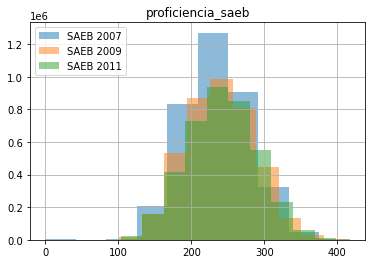

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
saeb7.hist(column=['proficiencia_saeb'], ax=ax, alpha=0.5, label='SAEB 2007')
saeb9.hist(column=['proficiencia_saeb'], ax=ax, alpha=0.5, label='SAEB 2009')
saeb11.hist(column=['proficiencia_saeb'], ax=ax, alpha=0.5, label='SAEB 2011')
plt.legend(loc='upper left')